# How things go wrong for a stochastic MJP model of gene expression

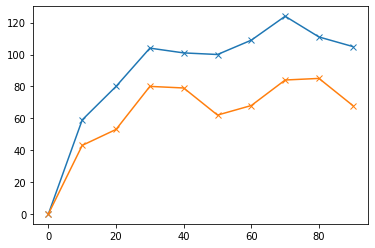

In [1]:
from study_abc_noise.model import MRNATranscription1dModelVars as ModelVars
import pyabc
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

n_t = 10
mv = ModelVars(noise_success_probability=0.7, n_t=n_t)

model = mv.get_model()
model_noisy = mv.get_model_noisy()
prior = mv.get_prior()

def get_data():
    try:
        data_nonoise, data = pickle.load(open(f"data_{n_t}.dat", 'rb'))
    except:
        data_nonoise = model(mv.p_true)
        data = mv.add_noise_to_data(data_nonoise)
        pickle.dump((data_nonoise, data), open(f"data_{n_t}.dat", 'wb'))
    return data_nonoise, data

data_nonoise, data = get_data()

distance = mv.get_distance()
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

plt.plot(data_nonoise['t'], data_nonoise['mrna'], 'x-')
plt.plot(data['t'], data['mrna'], 'x-')

In [3]:
abc = pyabc.ABCSMC(model, prior, distance)
abc.new("sqlite:///h_incorrect_1d.db", data)
abc.run(max_nr_populations=15)

INFO:History:Start <ABCSMC(id=1, start_time=2019-11-25 11:14:33.663176, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 81814.5
INFO:ABC:t: 0, eps: 81814.5.
INFO:ABC:Acceptance rate: 100 / 175 = 5.7143e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 19753.499999999985.
INFO:ABC:Acceptance rate: 100 / 197 = 5.0761e-01, ESS=9.8452e+01.
INFO:ABC:t: 2, eps: 5216.622883588908.
INFO:ABC:Acceptance rate: 100 / 188 = 5.3191e-01, ESS=9.7858e+01.
INFO:ABC:t: 3, eps: 2128.1375293870988.
INFO:ABC:Acceptance rate: 100 / 210 = 4.7619e-01, ESS=9.8786e+01.
INFO:ABC:t: 4, eps: 1344.181383880946.
INFO:ABC:Acceptance rate: 100 / 309 = 3.2362e-01, ESS=9.6139e+01.
INFO:ABC:t: 5, eps: 1064.59611639223.
INFO:ABC:Acceptance rate: 100 / 406 = 2.4631e-01, ESS=9.2061e+01.
INFO:ABC:t: 6, eps: 839.7603620658786.
INFO:ABC:Acceptance rate: 100 / 961 = 1.0406e-01, ESS=8.4088e+01.
INFO:ABC:t: 7, eps: 688.8160371300235.
INFO:ABC:Acceptance rate: 100 / 1715 = 5.8309e-02, ESS=7.3636e+01.


KeyboardInterrupt: 

In [2]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor)
abc.new("sqlite:///h_stochastic_acceptor_1d.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=2, start_time=2019-12-25 23:24:27.285112, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-3.7159e+01 for t=0.
INFO:ABC:t: 0, eps: 328.1779742450537.
INFO:ABC:Acceptance rate: 100 / 326 = 3.0675e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=-3.7159e+01 for t=1.
INFO:ABC:t: 1, eps: 67.11653387635269.
DEBUG:Acceptor:Encountered pd=-3.5613e+01 > c=-3.7159e+01, thus weight=1.0233e+00.
DEBUG:Acceptor:Encountered pd=-3.3173e+01 > c=-3.7159e+01, thus weight=1.0612e+00.
DEBUG:Acceptor:Encountered pd=-3.0494e+01 > c=-3.7159e+01, thus weight=1.1044e+00.
INFO:ABC:Acceptance rate: 100 / 364 = 2.7473e-01, ESS=9.7980e+01.
DEBUG:Acceptor:pdf_norm=-3.0494e+01 for t=2.
INFO:ABC:t: 2, eps: 33.357872309397756.
DEBUG:Acceptor:Encountered pd=-2.9197e+01 > c=-3.0494e+01, thus weight=1.0396e+00.
DEBUG:Acceptor:Encountered pd=-2.8438e+01 > c=-3.0494e+01, thus weight=1.0636e+00.
DEBUG:Acceptor:Encountered pd=-2.8253e+01 > c=-3.0494e+01, thus weight=1

  File "<__array_function__ internals>", line 6, in cumsum
  File "/home/yannik/ssa/ssa/model.py", line 90, in simulate
    ret = self.engine.execute(tasks)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 2423, in cumsum
    return _wrapfunc(a, 'cumsum', axis=axis, dtype=dtype, out=out)
  File "/home/yannik/ssa/ssa/model.py", line 90, in simulate
    ret = self.engine.execute(tasks)
  File "/home/yannik/ssa/ssa/engine.py", line 55, in execute
    ret.append(task.execute())
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/internals/blocks.py", line 122, in __init__
    self.mgr_locs = placement
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 61, in _wrapfunc
    return bound(*args, **kwds)
  File "/home/yannik/ssa/ssa/engine.py", line 55, in execute
    ret.append(task.execute())
KeyboardInterrupt
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/internals/b

KeyboardInterrupt: 

16 13


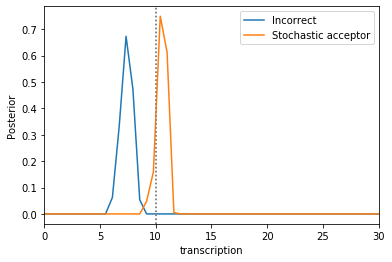

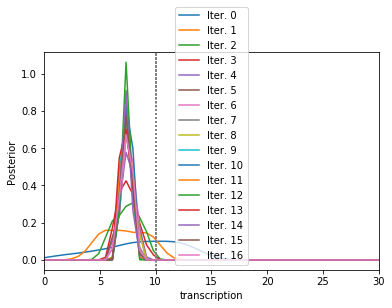

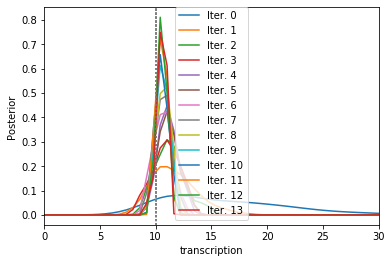

In [7]:
import pyabc
%matplotlib inline

def plot(h, x, ax, limits, p_true):
    for t in range(0, h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(
            h, t=t, x=x, xmin=limits[x][0], xmax=limits[x][1], ax=ax,
            refval=p_true, label=f"Iter. {t}")
    ax.legend()
    return ax

h_incorrect = pyabc.History("sqlite:///h_incorrect_1d.db")
h = pyabc.History("sqlite:///h_stochastic_acceptor_1d.db")
print(h_incorrect.max_t, h.max_t)

for p in mv.p_true:
    _, ax = plt.subplots()
    for h, label in [(h_incorrect, "Incorrect"), (h, "Stochastic acceptor")]:
        pyabc.visualization.plot_kde_1d_highlevel(h, x=p, xmin=mv.limits[p][0], xmax=mv.limits[p][1], ax=ax,
                                                 refval=mv.p_true, label=label)
    ax.legend()

for p in mv.p_true:
    _, ax = plt.subplots()
    plot(h_incorrect, p, ax, mv.limits, mv.p_true)
    _, ax = plt.subplots()
    plot(h, p, ax, mv.limits, mv.p_true)
    ax.legend()